In [1]:
import stats
import time
import shapely as shp
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from math import inf, ceil
import numpy as np

#stats.DB_PATH = '/home/aislab/Desktop'

In [2]:
path = '/home/aislab/Desktop/data_test.db'
path = 'C:\\Users\\mauro\\Documents\\data_test.db'
maps = [map for map in stats.SingleRun(path, 99).finalMaps['map'].iloc]
SR = stats.SingleRun(path, 99)
maps = [SR.get_final_map_single(n)['map'] for n in range(1,SR.get_robot_nr()+1)]

In [3]:
'''
{'header': {'seq': 852,
  'stamp': {'secs': 1977, 'nsecs': 370000000},
  'frame_id': 'robot2/map'},
 'info': {'map_load_time': {'secs': 0, 'nsecs': 0},
  'resolution': 0.05000000074505806,
  'width': 1216,
  'height': 1248,
  'origin': {'position': {'x': -10.0, 'y': -10.0, 'z': 0.0},
   'orientation': {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}}},
'''

"\n{'header': {'seq': 852,\n  'stamp': {'secs': 1977, 'nsecs': 370000000},\n  'frame_id': 'robot2/map'},\n 'info': {'map_load_time': {'secs': 0, 'nsecs': 0},\n  'resolution': 0.05000000074505806,\n  'width': 1216,\n  'height': 1248,\n  'origin': {'position': {'x': -10.0, 'y': -10.0, 'z': 0.0},\n   'orientation': {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}}},\n"

In [4]:
x = np.array(
    [[i*10+j for j in range(10)] for i in range(8)]
)
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79]])

In [5]:
x[:,9:10]!=49

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

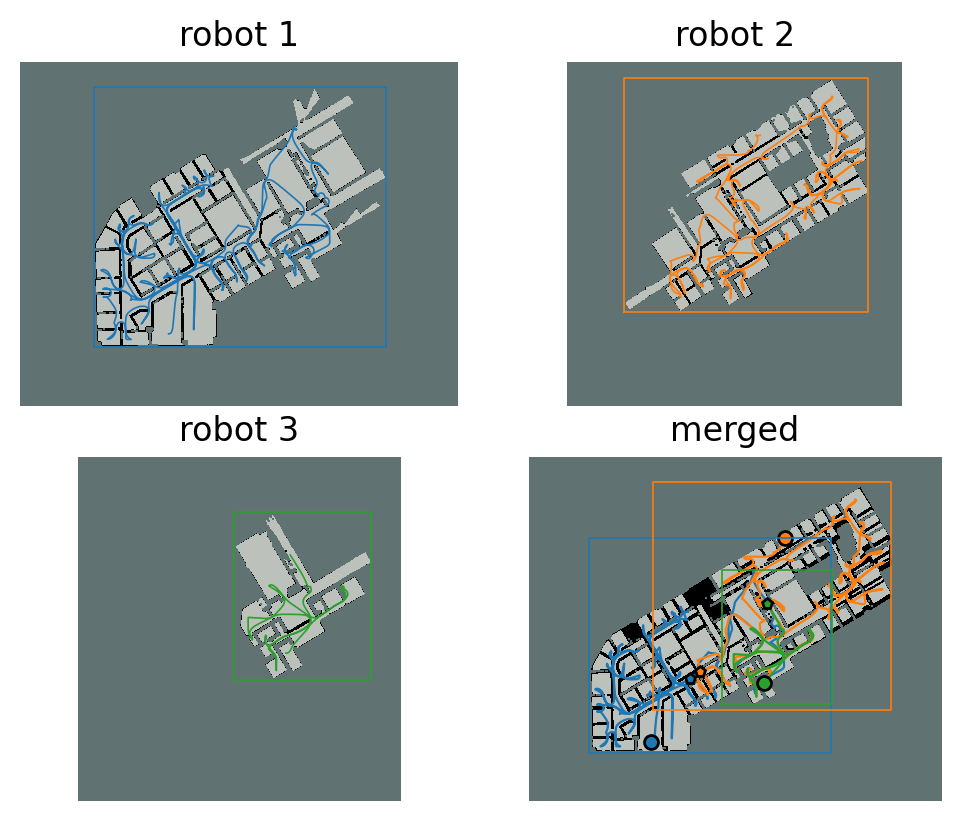

In [6]:
SR = stats.SingleRun(path, 462, 'e40')
SR.check_final_maps()

[(3.552713678800501e-15, 0.0, 67.20000100135803, 52.80000078678131),
 (12.8, 3.552713678800501e-15, 73.6000009059906, 62.40000092983246),
 (12.8, 3.552713678800501e-15, 60.800000715255734, 51.20000076293945)]

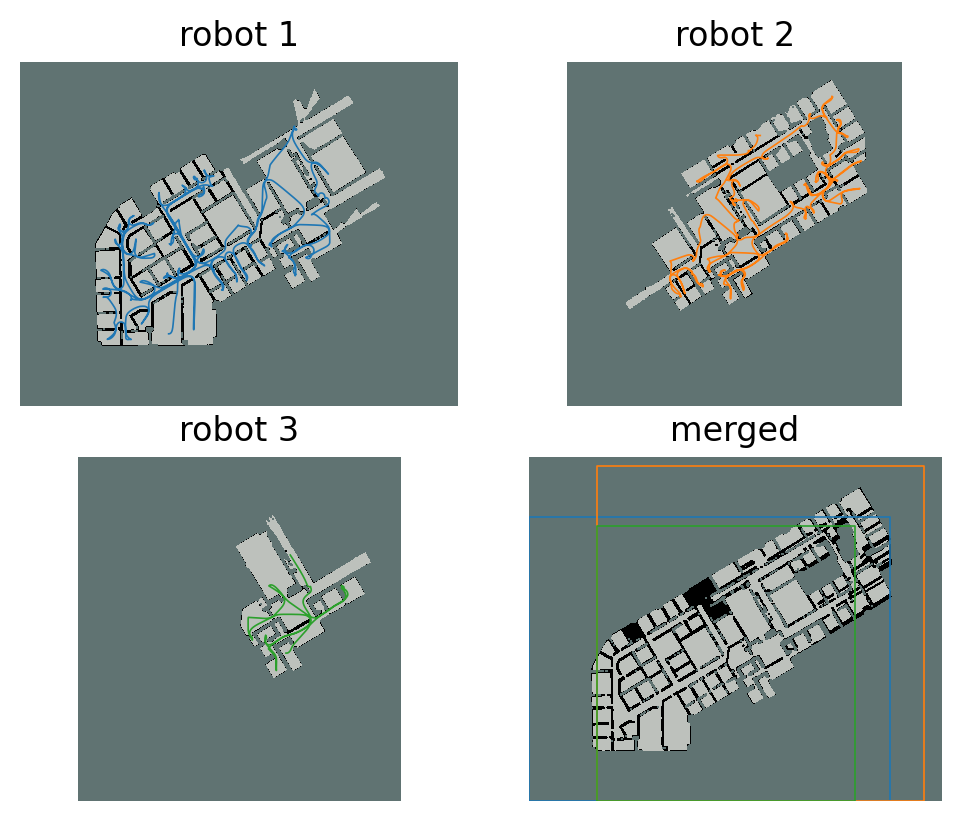

In [7]:
SR = stats.SingleRun(path, 462, 'e40')
n = SR.get_robot_nr()

_, axs = plt.subplots(ceil((n+1)/2), 2, dpi=200)

borders = []

m_ox, m_oy = (stats.get_origin(SR.finalMap)['x'],stats.get_origin(SR.finalMap)['y'])

for robot in range(1, n+1):
    ax = axs[(robot-1)//2][(robot-1)%2]
    map = SR.get_final_map_single(robot)['map']
    
    stats.plot_occ_grid(map, ax)
    min_x = stats.get_origin(map)['x']-m_ox
    min_y = stats.get_origin(map)['y']-m_oy
    max_x = (stats.get_origin(map)['x']-m_ox)+stats.get_size(map)[1]*stats.get_res(map)
    max_y = (stats.get_origin(map)['y']-m_oy)+stats.get_size(map)[0]*stats.get_res(map)
    borders.append((min_x,min_y,max_x,max_y))
    trace = SR.get_tracciato(
        robot,
        origin = (stats.get_origin(map)['x'], stats.get_origin(map)['y']),
        resolution = stats.get_res(map)
    )
    ax.plot(
        *trace.coords.xy,
        linewidth=.6,
        color=stats.COLOR_LIST[(robot-1)%len(stats.COLOR_LIST)]
    )
    ax.set_title(f'robot {robot}')
    ax.axis('off')
stats.plot_occ_grid(
    SR.finalMap,
    axs[-1][-1]
)
#SR.plot_tracciato(ax=axs[-1][-1], map=SR.finalMap)
for robot in range(1, n+1):
    min_x = borders[robot-1][0]/0.05
    min_y = borders[robot-1][1]/0.05
    max_x = borders[robot-1][2]/0.05
    max_y = borders[robot-1][3]/0.05
    axs[-1][-1].plot(
        [min_x,max_x,max_x,min_x,min_x],
        [min_y,min_y,max_y,max_y,min_y],
        linewidth=.6
    )    
axs[-1][-1].axis('off')
axs[-1][-1].set_title('merged')
plt.subplots_adjust(wspace=0, hspace=0.15)
borders

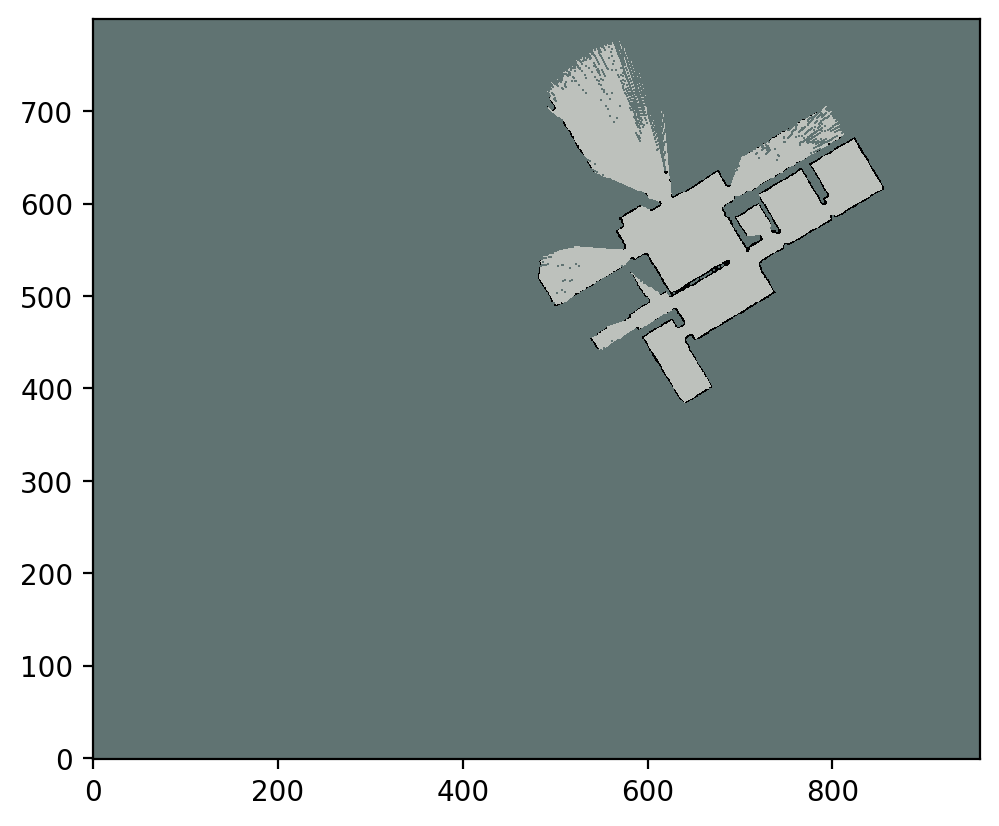

In [8]:
plt.subplots(dpi=200)
stats.plot_occ_grid(stats.SingleRun(path, 419, 'e40').finalMaps['map'].iloc[3],plt.gca())

0.9966792565942838

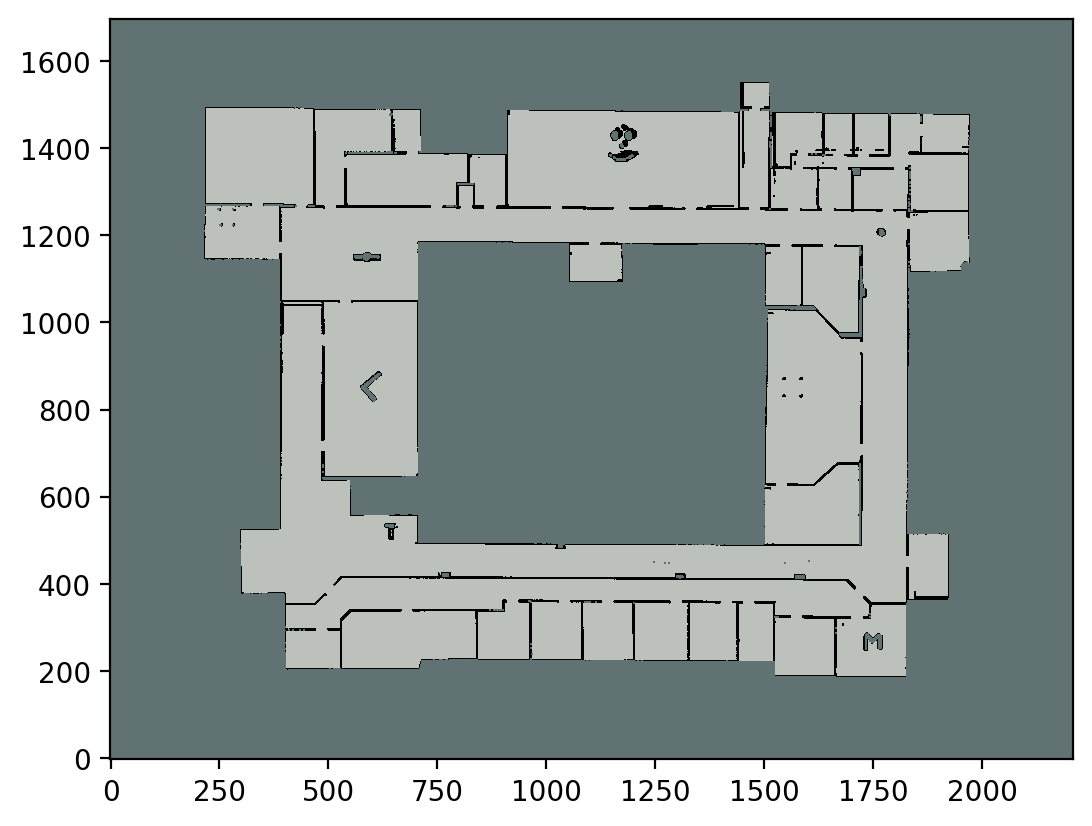

In [9]:
plt.subplots(dpi=200)
stats.SingleRun(path, 52, 'office_big').get_perc_area(check_map=True)

Text(0.5, 1.0, 'real')

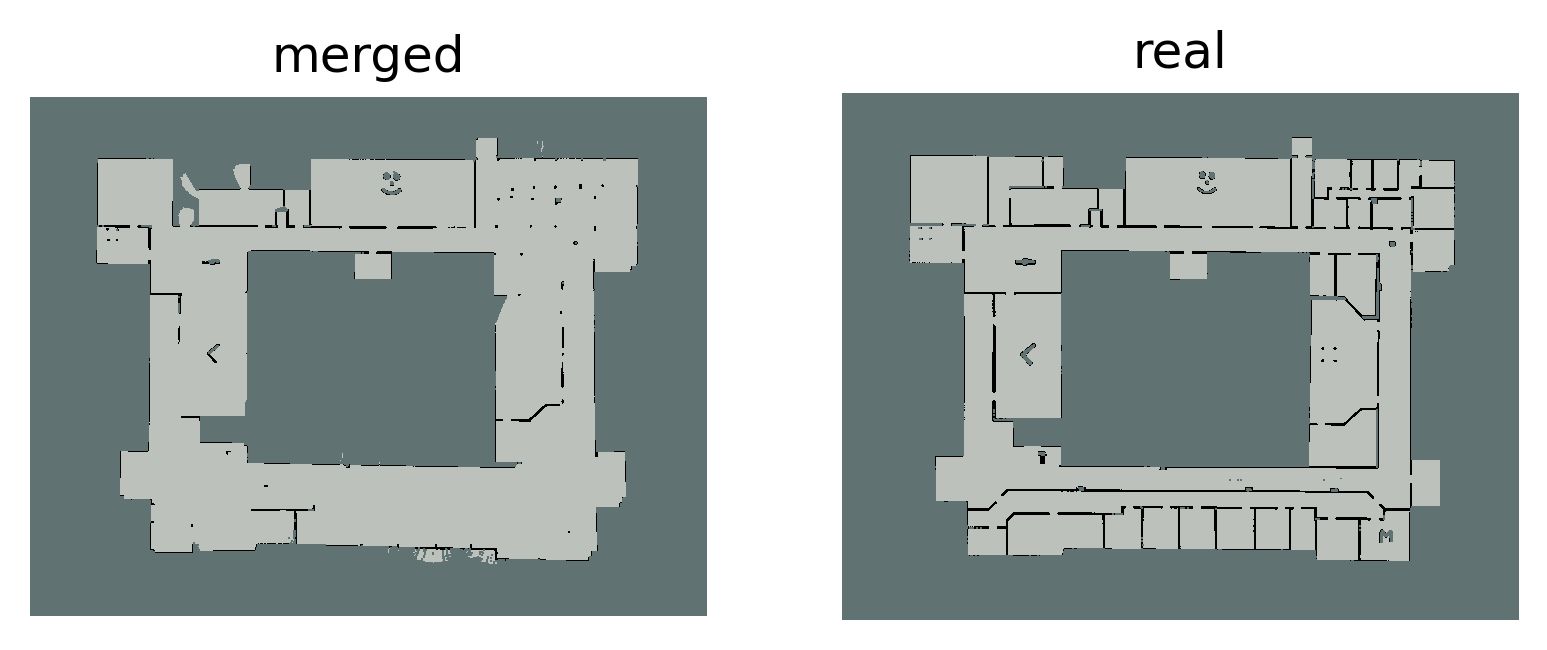

In [10]:
_, axs = plt.subplots(1,2,dpi=300)
stats.plot_occ_grid(stats.SingleRun(path, 31).finalMap, axs[0])
stats.plot_occ_grid(
    stats.MAPS['office_big'],
    axs[1]
)
for ax in axs: ax.axis('off')
axs[0].set_title('merged')
axs[1].set_title('real')

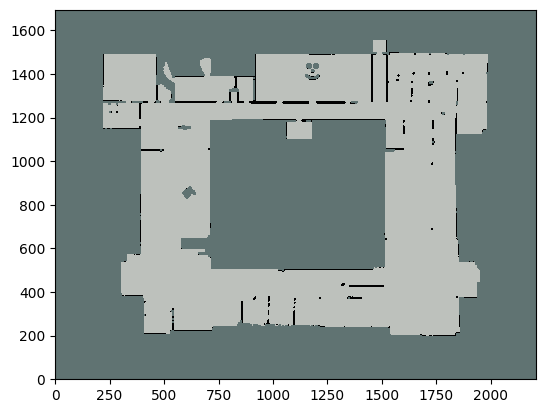

In [11]:
#plt.subplots(dpi=200)

get_size   = lambda map: (map['info']['height'], map['info']['width'])
get_origin = lambda map: map['info']['origin']['position']
get_res    = lambda map: map['info']['resolution']

min_x = min([get_origin(map)['x'] for map in maps])
min_y = min([get_origin(map)['y'] for map in maps])
max_x = max([get_origin(map)['x']+get_size(map)[1]*get_res(map) for map in maps])
max_y = max([get_origin(map)['y']+get_size(map)[0]*get_res(map) for map in maps])

h = round((max_y-min_y)/get_res(maps[0]))
w = round((max_x-min_x)/get_res(maps[0]))

img = np.zeros((h,w),dtype=np.int16)-1

for map in maps:
    res     = get_res(map) 
    left    = round((get_origin(map)['x'] - min_x)/res)
    right   = left + get_size(map)[1]
    bottom  = round((get_origin(map)['y'] - min_y)/res)
    up      = bottom + get_size(map)[0]
    section = img[bottom:up,left:right]
    img[bottom:up,left:right] = section * stats.get_map_img(map)
    img[bottom:up,left:right] = section * -1
    section[section>100] = 100
    section[section<-1]  = 100
    
stats.plot_map(img, plt.gca())
#img[img>100]

loop1	step1:0.12, step2:0.01
loop1	step1:0.1, step2:0.01
loop1	step1:0.1, step2:0.01
loop1	step1:0.07, step2:0.01
loop1	step1:0.06, step2:0.01
loop1	step1:0.05, step2:0.0
loop1	step1:0.12, step2:0.01


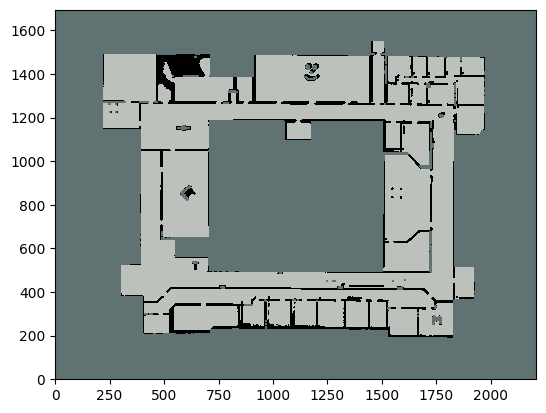

In [12]:
#plt.subplots(dpi=200)
real_map = stats.MAPS['office_big']

min_x = min([get_origin(map)['x'] for map in [real_map] + maps])
min_y = min([get_origin(map)['y'] for map in [real_map] + maps])
max_x = max([get_origin(map)['x']+get_size(map)[1]*get_res(map) for map in [real_map] + maps])
max_y = max([get_origin(map)['y']+get_size(map)[0]*get_res(map) for map in [real_map] + maps])

h = round((max_y-min_y)/get_res(maps[0]))
w = round((max_x-min_x)/get_res(maps[0]))

img = np.zeros((h,w),dtype=np.int16)-1

for idx, map in enumerate([real_map] + maps + [real_map]):
    now = time.time()
    res     = get_res(map) 
    left    = round((get_origin(map)['x'] - min_x)/res)
    right   = left + get_size(map)[1]
    bottom  = round((get_origin(map)['y'] - min_y)/res)
    up      = bottom + get_size(map)[0]
    section = img[bottom:up,left:right]
    map_img = stats.get_map_img(map)

    step1 = time.time()

    if idx==len(maps)+1:
        img[bottom:up,left:right] = section + map_img
        section[section==-2] = -1
        section[section==99] = 100
    else:
        img[bottom:up,left:right] = section * map_img
        if real_map and idx==0: img[img==0] = 100
        img[bottom:up,left:right] = section * -1
    section[section>100] = 100
    section[section<-1]  = 100

    step2 = time.time()
    print(f"loop1\tstep1:{round(step1-now,2)}, step2:{round(step2-step1,2)}")

stats.plot_map(img, plt.gca())

In [13]:
len(img)*len(img[0]) - len(img[img==-1]) - len(img[img==0]) - len(img[img==100])

0

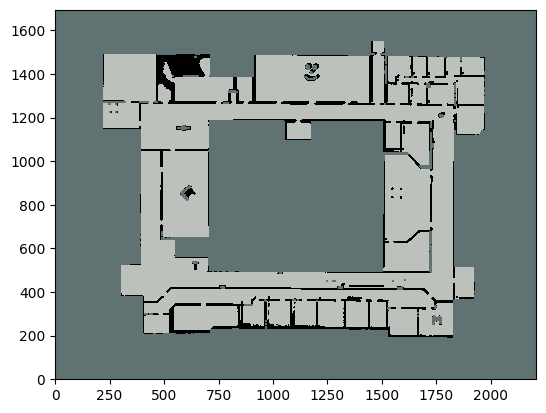

In [14]:
stats.plot_occ_grid(stats.SingleRun(path,99,real_map='office_big').get_final_map(old_method=False),plt.gca())

In [15]:
TS_office2_3 = stats.TestSet(
    path,
    {'my': [299,169,170,171,172,301,303,302,300,304],
     'el': [173,174,175,176,177,178,179,180,216,217]},
    'office_2'
)
TS_office2_5 = stats.TestSet(
    path,
    {'my': [128,129,161,163,164,165,240,241,243,305],
     'el': [132,133,134,140,144,137,144,289,293,291]},
    'office_2'
)
TS_office2_8 = stats.TestSet(
    path,
    {'my': [120,121,122,125,124,123,250,246,247,306],
     'el': [114,115,116,118,119,251,294,295,296,308]},
    'office_2'
)
TS_bigoffice_3 = stats.TestSet(
    path,
    {'my': [107,106,104,185,186,187,190,191,275,276],
     'el': [197,199,72,404,198,195,192,193,194,198]},
     'office_big'
)
TS_bigoffice_5 = stats.TestSet(
    path,
    {'my': [399,39,81,402,99,101,207,209,211,210],
     'el': [24,22,29,31,30,32,202,277,278,279]},
    'office_big'
)
TS_bigoffice_8 = stats.TestSet(
    path,
    {'my': [20,43,60,65,91,93,94,95,97,288],
     'el': [46,51,52,54,69,280,285,282,345,350]},
    'office_big'
)
TS_map23_3 = stats.TestSet(
    path,
    {'my': [212,213,214,158,157,159,334,354,348,344],
     'el': [145,215,324,326,327,330,331,338,340,349]},
    'map23'
)
TS_E13_3 = stats.TestSet(
    path,
    {'my': [359,440,363,441,445,446,448,382,375,383],
     'el': [407,357,358,361,362,365,366,367,368,406,408,409,410]},
    'e13'
)
TS_E40_3 = stats.TestSet(
    path,
    {'my': [419,422,426,429,432,436,438,472,475,480],
     'el': [389,391,415,444,452,453,462,464,465,466]},
    'e40'
)

In [16]:
TS_E40_3.get_perc_areas()

{'my': {419: 0.4734709129149007,
  422: 0.5514898523492799,
  426: 0.7054373471980526,
  429: 0.47154067067376987,
  432: 0.4859918647976342,
  436: 0.9187013569346728,
  438: 0.8631407005669018,
  472: 0.61647538620859,
  475: 0.6063266678766268,
  480: 0.6111778961640706},
 'el': {389: 0.6352055686634567,
  391: 0.6602730951135405,
  415: 0.5969573062017572,
  444: 0.8758879861637503,
  452: 0.6415578592247003,
  453: 0.6959612243372799,
  462: 0.9041199141640065,
  464: 0.4891306436631898,
  465: 0.9911559033597745,
  466: 0.9518400290390425}}